In [1]:
%matplotlib inline
import pandas as pd

In [2]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [3]:
titles = pd.DataFrame.from_csv('data/titles.csv', index_col=None)
titles.head()

,title,year
0,The Rising Son,1990
1,The Thousand Plane Raid,1969
2,The Spider and the Fly,1949
3,Country,2000
4,Gai shi dao wang,1969


In [4]:
cast = pd.DataFrame.from_csv('data/cast.csv', index_col=None)
cast.head()

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN


### Using groupby(), plot the number of films that have been released each decade in the history of cinema.

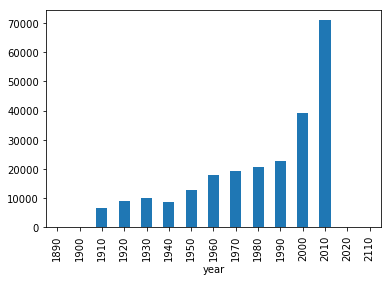

In [7]:
titles.groupby(titles.year//10*10).size().plot(kind="bar")

### Use groupby() to plot the number of "Hamlet" films made each decade.

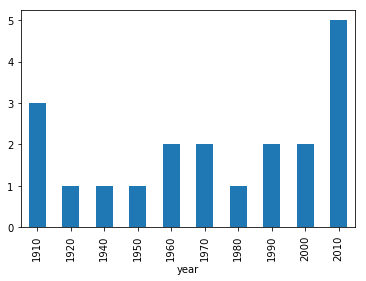

In [14]:
a=titles[titles.title=="Hamlet"]
a.groupby(a.year//10*10).size().plot(kind="bar")

### How many leading (n=1) roles were available to actors, and how many to actresses, in each year of the 1950s?

In [18]:
cast[cast.year//10*10==1950].groupby(["year","type"]).size().unstack()

type,actor,actress
year,,
1950,16800,5594
1951,17651,5905
1952,17217,5868
1953,16848,5863
1954,14171,5134
1955,15104,5533
1956,15969,6290
1957,15424,5955
1958,14651,5553


### In the 1950s decade taken as a whole, how many total roles were available to actors, and how many to actresses, for each "n" number 1 through 5?

In [22]:
a=cast[cast.year//10*10==1950]
a[(a.n>=1) & (a.n<=5)].type.value_counts()

actor      28310
actress    16243
Name: type, dtype: int64

### Use groupby() to determine how many roles are listed for each of the Pink Panther movies.

In [25]:
cast[cast.title=="The Pink Panther"].groupby(["year"]).size()

year
1963    21
2006    90
dtype: int64

### List, in order by year, each of the films in which Frank Oz has played more than 1 role.

In [53]:
a=cast[cast.name=="Frank Oz"].groupby(["year","title"]).size()
a[a-1>0]

year  title                               
1979  The Muppet Movie                        8
1981  An American Werewolf in London          2
      The Great Muppet Caper                  6
1982  The Dark Crystal                        2
1984  The Muppets Take Manhattan              7
1985  Follow That Bird                        3
1992  The Muppet Christmas Carol              7
1996  Muppet Treasure Island                  4
1999  Muppets from Space                      4
      The Adventures of Elmo in Grouchland    3
dtype: int64

### List each of the characters that Frank Oz has portrayed at least twice.

In [62]:
a=cast[cast.name=="Frank Oz"].groupby("character").size()
a[a-1>0]

character
Animal            6
Bert              3
Cookie Monster    5
Fozzie Bear       4
Grover            2
Miss Piggy        6
Sam the Eagle     5
Yoda              6
dtype: int64